In [174]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
import matplotlib.pyplot as plt
import seaborn as sns

In [175]:
df=pd.read_csv('generated_dataset.csv')
df.head()

Age  Height  Gender      City    Income  Color
0   NaN   151.6  Female  New York  71362.53  Green
1  76.9   181.8    Male     Tokyo  26731.20  Green
2  63.4   165.7    Male     Tokyo  32930.30  Green
3  55.1   175.4    Male     Paris  91884.34    Red
4  27.7   195.4   Other    London  68514.32   Blue

In [176]:
continuous_features = ['Age', 'Height', 'Income']
categorical_features =['Gender', 'City']

x=df.drop('Color',axis=1)
y=LabelEncoder().fit_transform(df['Color'].copy())



print(x.head())


    Age  Height  Gender      City    Income
0   NaN   151.6  Female  New York  71362.53
1  76.9   181.8    Male     Tokyo  26731.20
2  63.4   165.7    Male     Tokyo  32930.30
3  55.1   175.4    Male     Paris  91884.34
4  27.7   195.4   Other    London  68514.32


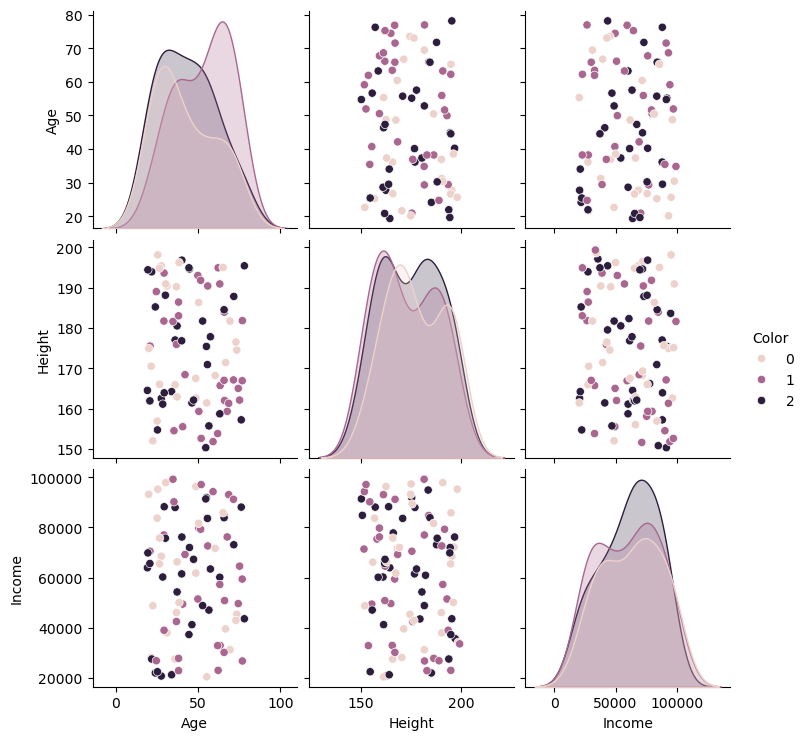

In [177]:
df_plot=x.copy()
df_plot['Color']=y

sns.pairplot(df_plot,hue='Color')

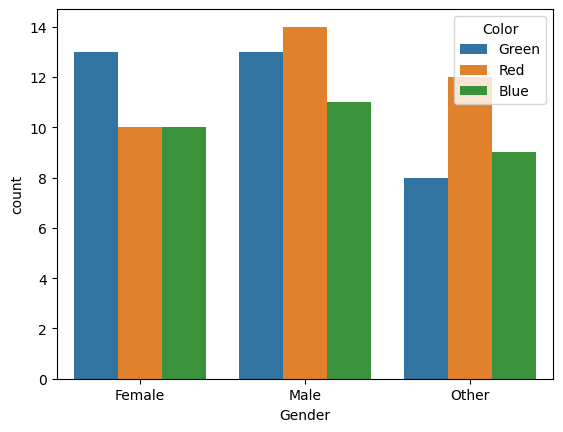

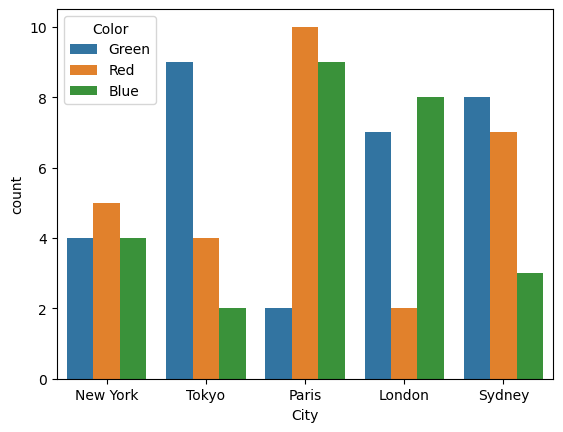

In [178]:
for col in categorical_features:
    sns.countplot(x=col, hue='Color', data=df)
    plt.show()


In [179]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.2)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(80, 5)
(20, 5)
(80,)
(20,)


In [180]:
cont_imputer=SimpleImputer(strategy="mean")
x_train[continuous_features]=cont_imputer.fit_transform(x_train[continuous_features])
x_test[continuous_features]=cont_imputer.transform(x_test[continuous_features])


print(x_train.head())

          Age  Height  Gender      City    Income
55  75.200000   162.1  Female    London  64544.10
88  73.000000   176.5    Male  New York  42923.30
26  30.400000   190.9    Male  New York  97840.84
42  20.100000   174.9    Male    London  93189.15
69  46.336232   179.5    Male  New York  43487.35


In [181]:
cat_imputer=SimpleImputer(strategy="most_frequent")
x_train[categorical_features]=cat_imputer.fit_transform(x_train[categorical_features])
x_test[categorical_features]=cat_imputer.transform(x_test[categorical_features])


In [182]:

x_train=pd.get_dummies(x_train,columns=categorical_features,drop_first=True)
x_test=pd.get_dummies(x_test,columns=categorical_features,drop_first=True)

print(x_train.head())

          Age  Height    Income  Gender_Male  Gender_Other  City_New York  \
55  75.200000   162.1  64544.10        False         False          False   
88  73.000000   176.5  42923.30         True         False           True   
26  30.400000   190.9  97840.84         True         False           True   
42  20.100000   174.9  93189.15         True         False          False   
69  46.336232   179.5  43487.35         True         False           True   

    City_Paris  City_Sydney  City_Tokyo  
55       False        False       False  
88       False        False       False  
26       False        False       False  
42       False        False       False  
69       False        False       False  


In [183]:
scaler=MinMaxScaler()
x_train[continuous_features]=scaler.fit_transform(x_train[continuous_features])
x_test[continuous_features]=scaler.transform(x_test[continuous_features])

print(x_train.head())

         Age    Height    Income  Gender_Male  Gender_Other  City_New York  \
55  0.950427  0.240816  0.560146        False         False          False   
88  0.912821  0.534694  0.285768         True         False           True   
26  0.184615  0.828571  0.982697         True         False           True   
42  0.008547  0.502041  0.923665         True         False          False   
69  0.457030  0.595918  0.292926         True         False           True   

    City_Paris  City_Sydney  City_Tokyo  
55       False        False       False  
88       False        False       False  
26       False        False       False  
42       False        False       False  
69       False        False       False  


In [184]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
y_pred_lr = log_reg.predict(x_test)
lr_metrics = {
    'Model': 'Logistic Regression',
    'Accuracy': accuracy_score(y_test, y_pred_lr),
    'Recall': recall_score(y_test, y_pred_lr, average='macro'),
    'Precision': precision_score(y_test, y_pred_lr, average='macro'),
    'F1-Score': f1_score(y_test, y_pred_lr, average='macro')
}
print("Logistic Regression Metrics:", lr_metrics)

Logistic Regression Metrics: {'Model': 'Logistic Regression', 'Accuracy': 0.4, 'Recall': 0.38888888888888884, 'Precision': 0.4388888888888889, 'F1-Score': 0.4037037037037037}


In [185]:
svm = SVC()
svm.fit(x_train, y_train)
y_pred_svm = svm.predict(x_test)
svm_metrics = {
    'Model': 'SVM',
    'Accuracy': accuracy_score(y_test, y_pred_svm),
    'Recall': recall_score(y_test, y_pred_svm, average='macro'),
    'Precision': precision_score(y_test, y_pred_svm, average='macro'),
    'F1-Score': f1_score(y_test, y_pred_svm, average='macro')
}
print("SVM Metrics:", svm_metrics)

SVM Metrics: {'Model': 'SVM', 'Accuracy': 0.25, 'Recall': 0.25, 'Precision': 0.1851851851851852, 'F1-Score': 0.21176470588235294}


In [186]:
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
rf_metrics = {
    'Model': 'Random Forest',
    'Accuracy': accuracy_score(y_test, y_pred_rf),
    'Recall': recall_score(y_test, y_pred_rf, average='macro'),
    'Precision': precision_score(y_test, y_pred_rf, average='macro'),
    'F1-Score': f1_score(y_test, y_pred_rf, average='macro')
}
print("Random Forest Metrics:", rf_metrics)

Random Forest Metrics: {'Model': 'Random Forest', 'Accuracy': 0.3, 'Recall': 0.3194444444444444, 'Precision': 0.2809523809523809, 'F1-Score': 0.29304029304029305}


In [ ]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)

y_pred_rf = rf.predict(x_test)

nb_metrics = {
    'Model': 'Naive Bayes ',
    'Accuracy': accuracy_score(y_test, y_pred_rf),
    'Recall': recall_score(y_test, y_pred_rf, average='macro'),
    'Precision': precision_score(y_test, y_pred_rf, average='macro'),
    'F1-Score': f1_score(y_test, y_pred_rf, average='macro')
}
print("Naive Bayes Metrics:", nb_metrics)

Naive Bayes Metrics: {'Model': 'Naive Bayes Forest', 'Accuracy': 0.3, 'Recall': 0.3194444444444444, 'Precision': 0.2809523809523809, 'F1-Score': 0.29304029304029305}


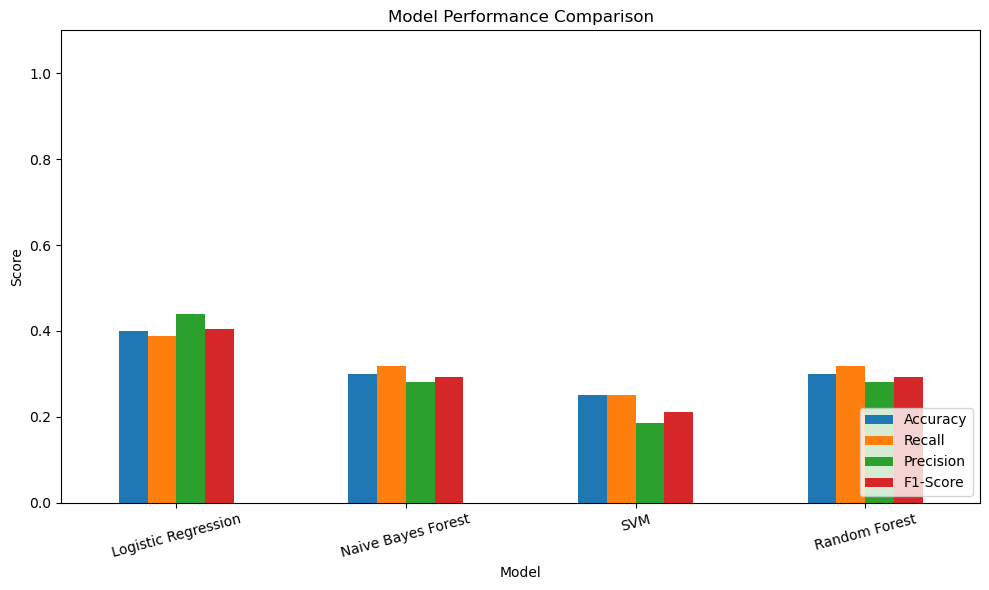

In [188]:
metrics_df = pd.DataFrame([lr_metrics, nb_metrics, svm_metrics, rf_metrics])
metrics_df.set_index('Model', inplace=True)


metrics_df.plot(kind='bar', figsize=(10, 6))
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.ylim(0, 1.1)
plt.xticks(rotation=15)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()